<a href="https://colab.research.google.com/github/002alvina/Bot/blob/main/Practica3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

импортизация библиотек

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.manifold import TSNE
import umap



In [ ]:
!pip install umap-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 5.7 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86831 sha256=12a45230bbb374aeab48115227384044d6862783ffe298202573b490d825c6e1
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


In [ ]:
df = pd.read_csv('/content/backup-large.data')


Первичный осмотр данных

In [ ]:
# Вывести первые несколько строк датафрейма
print(df.head())

# Получить общую информацию о датафрейме
print(df.info())

# Описательная статистика данных
print(df.describe())

# Проверить наличие пропущенных значений
print(df.isnull().sum())
print(df.columns)

   diaporthe-stem-canker  6  0  2  1  0.1  1.1  1.2  1.3  0.2  ...  0.9  0.10  \
0  diaporthe-stem-canker  4  0  2  1    0    2    0    2    1  ...    0     0   
1  diaporthe-stem-canker  3  0  2  1    0    1    0    2    1  ...    0     0   
2  diaporthe-stem-canker  3  0  2  1    0    1    0    2    0  ...    0     0   
3  diaporthe-stem-canker  6  0  2  1    0    2    0    1    0  ...    0     0   
4  diaporthe-stem-canker  5  0  2  1    0    3    0    1    0  ...    0     0   

   0.11  4  0.12  0.13  0.14  0.15  0.16  0.17  
0     0  4     0     0     0     0     0     0  
1     0  4     0     0     0     0     0     0  
2     0  4     0     0     0     0     0     0  
3     0  4     0     0     0     0     0     0  
4     0  4     0     0     0     0     0     0  

[5 rows x 36 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 ------------

Предобработка данных

In [ ]:
# Пример преобразования категориального столбца в числовые значения
if 'diaporthe-stem-canker' in df.columns:
    df['diaporthe-stem-canker'] = df['diaporthe-stem-canker'].astype('category').cat.codes

# Можно также использовать One-Hot Encoding, если это более уместно
#df = pd.get_dummies(df, columns=['categorical_column_name'])

# Теперь можно масштабировать числовые данные
scaler = StandardScaler()
# Здесь мы выбираем только числовые столбцы для масштабирования
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Ваши данные теперь нормализованы и готовы для кластеризации



 Иерархическая кластеризация


In [ ]:
# Проверка наличия только числовых столбцов в df
if df.select_dtypes(include=[np.number]).shape[1] == df.shape[1]:
    # Все столбцы числовые, можно масштабировать
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df)
else:
    # Не все столбцы числовые, требуется предварительная обработка
    print("DataFrame содержит нечисловые столбцы.")



Длинные соединения: Дендрограмма показывает несколько длинных вертикальных соединений, которые указывают на естественное разделение между кластерами. Эти длинные соединения обычно представляют хорошее разделение и могут быть использованы для определения количества кластеров.

Количество кластеров: Высота вертикальных соединений можно использовать для выбора количества кластеров. Вы можете провести горизонтальную линию на высоте, где эти соединения встречаются (например, метод "наибольшего разрыва"), чтобы определить количество кластеров. Большой "разрыв" или расстояние между слияниями указывает на возможное разделение кластеров.

Выбор числа кластеров: Если провести горизонтальную линию на уровне, скажем, 25 (по оси y), мы пересечем значительное число вертикальных линий, что может указывать на количество кластеров. Выбор точной высоты для этой линии зависит от вашего конкретного приложения и того, насколько детализированное разделение вы хотите получить.

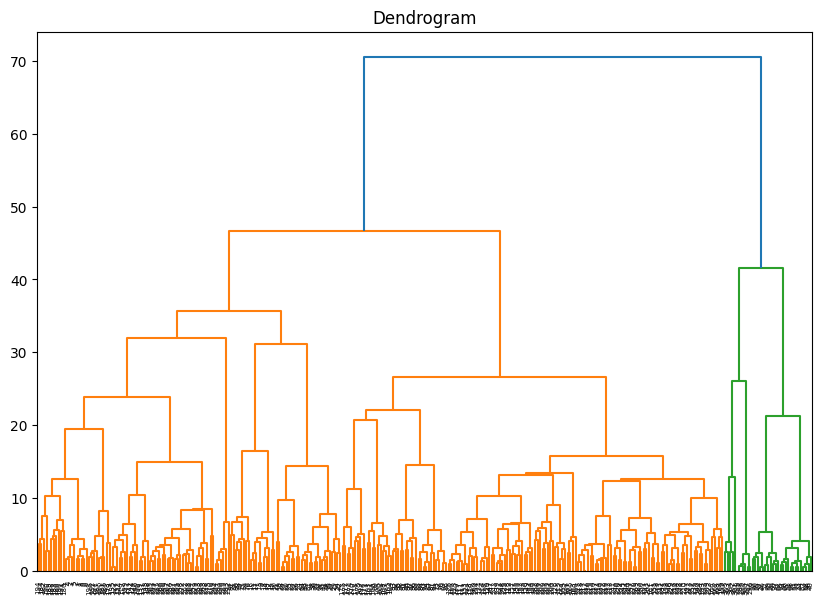

In [ ]:
# Вычисление связей для иерархической кластеризации
linked = linkage(df_scaled, method='ward')

# Построение дендрограммы
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.show()


Применение иерархической кластеризации с выбранным числом кластеров

Кластеры: Данные кажутся хорошо разделенными на три различных кластера, что указывает на то, что выбранное количество кластеров может быть подходящим для данного набора данных.

Распределение: Кластеры показывают различное распределение в двумерном пространстве, что может указывать на различные плотности или внутренние структуры внутри каждого кластера.

Интерпретация: Каждый кластер можно дополнительно исследовать для определения характерных признаков или моделей, которые могут предоставить более глубокое понимание данных.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


   diaporthe-stem-canker         6         0         2         1       0.1  \
0               0.260639  0.286389 -0.785389  0.608377 -0.117892 -0.081957   
1               0.260639 -0.293976 -0.785389  0.608377 -0.117892 -0.081957   
2               0.260639 -0.293976 -0.785389  0.608377 -0.117892 -0.081957   
3               0.260639  1.447120 -0.785389  0.608377 -0.117892 -0.081957   
4               0.260639  0.866755 -0.785389  0.608377 -0.117892 -0.081957   

        1.1       1.2       1.3       0.2  ...      0.10      0.11         4  \
0  0.188618 -1.497259  1.746667  0.831481  ...  0.012476 -0.417551  1.959113   
1 -0.806505 -1.497259  1.746667  0.831481  ...  0.012476 -0.417551  1.959113   
2 -0.806505 -1.497259  1.746667 -0.434356  ...  0.012476 -0.417551  1.959113   
3  0.188618 -1.497259  0.550962 -0.434356  ...  0.012476 -0.417551  1.959113   
4  1.183741 -1.497259  0.550962 -0.434356  ...  0.012476 -0.417551  1.959113   

       0.12      0.13     0.14     0.15      0.16 

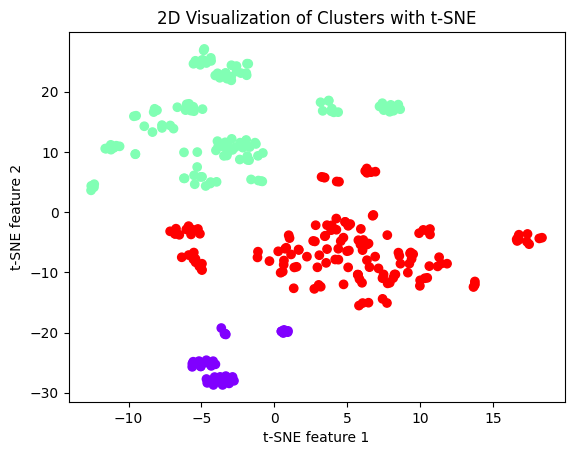

In [ ]:
# Предположим, вы выбрали 3 кластера (замените это число на выбранное вами количество кластеров)
n_clusters = 3

# Создание экземпляра AgglomerativeClustering с нужным количеством кластеров
cluster = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')

# Подгонка модели и предсказание кластеров
cluster_labels = cluster.fit_predict(df_scaled)

# Добавляем метки кластера обратно в исходный датафрейм для дальнейшего анализа
df['cluster_label'] = cluster_labels

# Выводим первые несколько строк обновленного датафрейма с метками кластера
print(df.head())

# Визуализация результатов (если у вас всего 2 или 3 числовых признака, иначе вам понадобится уменьшение размерности)
if df_scaled.shape[1] == 2:
    # Если только два признака, просто строим точечную диаграмму
    plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=cluster_labels, cmap='rainbow')
    plt.title('2D Visualization of Clusters')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()
elif df_scaled.shape[1] > 2:
    # Если более двух признаков, используйте метод уменьшения размерности, например, t-SNE
    tsne = TSNE(n_components=2, random_state=42)
    df_reduced = tsne.fit_transform(df_scaled)
    plt.scatter(df_reduced[:, 0], df_reduced[:, 1], c=cluster_labels, cmap='rainbow')
    plt.title('2D Visualization of Clusters with t-SNE')
    plt.xlabel('t-SNE feature 1')
    plt.ylabel('t-SNE feature 2')
    plt.show()

In [ ]:
# Расчет индекса силуэта
silhouette_avg = silhouette_score(df_scaled, cluster_labels)
print(f'Средний индекс силуэта для кластеров: {silhouette_avg:.2f}')

# В идеале вы хотите индекс силуэта близкий к 1
if silhouette_avg > 0.5:
    print("Это хорошее значение силуэта, что указывает на хорошее разделение кластеров.")
elif silhouette_avg > 0:
    print("Это низкое значение силуэта, кластеры могут перекрываться.")
else:
    print("Отрицательные значения силуэта указывают на то, что образцы могут быть назначены неправильным кластерам.")

Средний индекс силуэта для кластеров: 0.19
Это низкое значение силуэта, кластеры могут перекрываться.


In [ ]:
# Предположим, что истинные метки находятся в столбце 'true_cluster_label' вашего DataFrame
true_labels = df['1.7'].values


# Расчёт скорректированного индекса Рэнда
ari_score = adjusted_rand_score(true_labels, cluster_labels)
print(f'Скорректированный индекс Рэнда (ARI): {ari_score:.2f}')


Скорректированный индекс Рэнда (ARI): 0.29


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


In [ ]:
# Группировка данных по меткам кластера и получение описательной статистики
grouped_clusters = df.groupby('cluster_label').agg(['mean', 'std', 'median'])
print(grouped_clusters)


              diaporthe-stem-canker                             6            \
                               mean       std    median      mean       std   
cluster_label                                                                 
0                          0.835548  0.638535  1.175267 -0.791432  0.631739   
1                          0.132591  0.909726  0.260639  0.146134  1.069336   
2                         -0.299040  1.011945 -0.653989  0.067311  0.935191   

                                0                             2  ...  \
                 median      mean       std    median      mean  ...   
cluster_label                                                    ...   
0             -0.874341  0.315355  1.489085  1.049184 -0.704529  ...   
1              0.286389  0.024881  0.945253 -0.785389  0.186171  ...   
2              0.286389 -0.092868  0.892282 -0.785389  0.015351  ...   

                   0.14      0.15                          0.16         \
                 m

Разделение кластеров: На графике видно, что точки (наблюдения) разделены на три группы в соответствии с метками кластеров. Это указывает на то, что алгоритм кластеризации смог выявить структуру в данных.

Плотность и распределение: Кластеры кажутся довольно разрозненными, с некоторыми точками, расположенными далеко от основных групп. Это может указывать либо на наличие выбросов, либо на то, что данные в этих кластерах имеют большой разброс.

Возможность перекрытия: Несмотря на то что визуализация показывает разделение на три кластера, наблюдается некоторая близость точек разных кластеров. Это может указывать на возможное перекрытие между кластерами в многомерном пространстве.

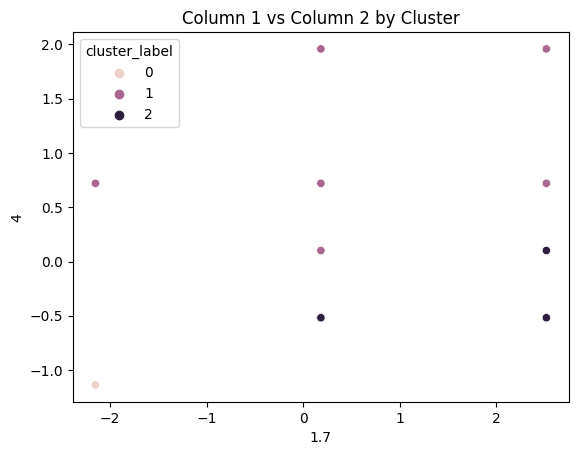

In [ ]:
# Замените 'column1' и 'column2' на имена ваших реальных столбцов
sns.scatterplot(x='1.7', y='4', hue='cluster_label', data=df)
plt.title('Column 1 vs Column 2 by Cluster')
plt.show()


In [ ]:
# Группировка данных по меткам кластера и получение статистических показателей
cluster_stats = df.groupby('cluster_label').agg(['mean', 'median', 'std'])
print(cluster_stats)


              diaporthe-stem-canker                             6            \
                               mean    median       std      mean    median   
cluster_label                                                                 
0                          0.835548  1.175267  0.638535 -0.791432 -0.874341   
1                          0.132591  0.260639  0.909726  0.146134  0.286389   
2                         -0.299040 -0.653989  1.011945  0.067311  0.286389   

                                0                             2  ...  \
                    std      mean    median       std      mean  ...   
cluster_label                                                    ...   
0              0.631739  0.315355  1.049184  1.489085 -0.704529  ...   
1              1.069336  0.024881 -0.785389  0.945253  0.186171  ...   
2              0.935191 -0.092868 -0.785389  0.892282  0.015351  ...   

                   0.14      0.15                          0.16            \
               

Распределение признака: В кластере 1 (середина) распределение признака шире и медиана выше, чем в других кластерах. Это может указывать на то, что значения признака в кластере 1 в среднем больше, чем в остальных.

Выбросы: В кластере 0 (слева) есть выбросы, как показано точками за пределами усов boxplot.

Симметричность: Распределение в кластере 1 кажется более симметричным по сравнению с другими кластерами, где медиана смещена к одной из границ ящика.

Смещение медианы: В кластере 2 (справа) медиана смещена к нижней границе ящика, что может указывать на асимметричное распределение с более тяжелым хвостом в сторону более низких значений.

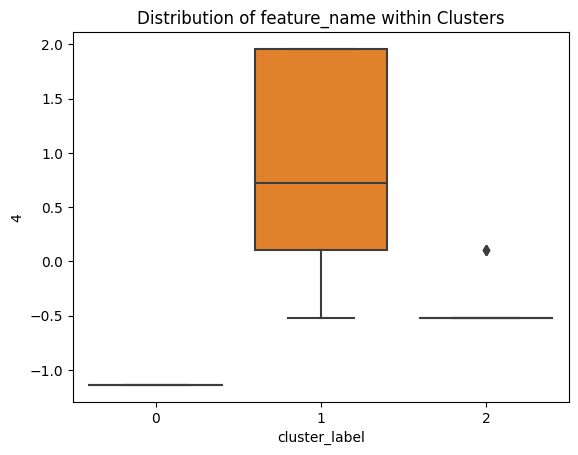

In [ ]:
# Для визуализации распределения признака 'feature_name' внутри кластеров
sns.boxplot(x='cluster_label', y='4', data=df)
plt.title('Distribution of feature_name within Clusters')
plt.show()
